This notebook will take in lending data and develop supervised learning models to help predict good and faulty loans for banks.


In [16]:
# Import the modules
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.metrics import balanced_accuracy_score, confusion_matrix, classification_report

# Import the train_test_learn module
from sklearn.model_selection import train_test_split

# Import the RandomOverSampler module form imbalanced-learn
from imblearn.over_sampling import RandomOverSampler

# Import the LogisticRegression module from SKLearn
from sklearn.linear_model import LogisticRegression

import matplotlib.pyplot as plt
import seaborn as sns


---

## Split the Data into Training and Testing Sets

### Step 1: Read the `lending_data.csv` data from the `Resources` folder into a Pandas DataFrame.

In [17]:
# Read the CSV file from the Resources folder into a Pandas DataFrame
file_path = Path("Resources/lending_data.csv")
df_lending = pd.read_csv(file_path)


# Review the DataFrame
df_lending.head()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
0,10700.0,7.672,52800,0.431818,5,1,22800,0
1,8400.0,6.692,43600,0.311927,3,0,13600,0
2,9000.0,6.963,46100,0.349241,3,0,16100,0
3,10700.0,7.664,52700,0.430740,5,1,22700,0
4,10800.0,7.698,53000,0.433962,5,1,23000,0


### Step 2: Create the labels set (`y`)  from the “loan_status” column, and then create the features (`X`) DataFrame from the remaining columns.


We separate the data into labels (y) and features (X) because this is a common data preparation step in machine learning. In a supervised learning task, we aim to train a model to predict the value of the target variable (in this case, "loan_status") based on the values of the input variables (in this case, all other columns except "loan_status").

To do this, we first need to split the data into two parts: the features, which are the input variables used to predict the target variable, and the labels, which are the target variable we are trying to predict.

By separating the data into labels and features, we can then use the features to train a machine learning model to predict the labels. The model can learn patterns and relationships in the features and their corresponding labels, and then use this knowledge to make predictions on new, unseen data.

Separating the data into labels and features is also useful for other data analysis tasks, such as exploratory data analysis and data visualization. It allows us to analyze and visualize the relationships between the input variables and the target variable separately, which can help us to better understand the data and identify potential patterns or trends.

In [18]:
# Separate the data into labels and features
y = df_lending["loan_status"]
# Separate the y variable, the labels
X = df_lending.drop("loan_status", axis=1)
# Separate the X variable, the features


In [19]:
# Review the y variable Series
print("y shape", y.shape)

y shape (77536,)


In [20]:
# Review the X variable DataFrame
print("X shape",X.shape)

X shape (77536, 7)


### Step 3: Check the balance of the labels variable (`y`) by using the `value_counts` function.

In [21]:
# Check the balance of our target values
label_counts = y.value_counts()
label_counts

0    75036
1     2500
Name: loan_status, dtype: int64

This indicates that the data is imbalanced, as there are more instances of one class than the other. This information can be used to inform the choice of machine learning algorithm and to determine if any sampling or weighting strategies should be applied to address the class imbalance.

### Step 4: Split the data into training and testing datasets by using `train_test_split`.

In [22]:


# Split the data using train_test_split by default it splits 75/25
# Assign a random_state of 1 to the function
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
#X_train, X_test, y_train, y_test

In [23]:
X_train.shape

(58152, 7)

---

## Create a Logistic Regression Model with the Original Data

###  Step 1: Fit a logistic regression model by using the training data (`X_train` and `y_train`).

The logistic regression model uses a logistic function (also known as a sigmoid function) to transform the linear combination of the independent variables into a probability value between 0 and 1. This probability represents the likelihood that the input sample belongs to the positive class. The logistic function has an S-shaped curve that approaches 0 for very large negative values and approaches 1 for very large positive values, with a midpoint at 0.

The logistic regression model can be trained using a variety of optimization algorithms, such as gradient descent or Newton's method, to find the coefficients that minimize the difference between the predicted probabilities and the actual labels in the training data. Once the model is trained, it can be used to make predictions on new data by applying the logistic function to the linear combination of the independent variables and comparing the resulting probability to a decision threshold, usually set to 0.5.

Logistic regression is a widely used technique in many fields, such as medicine, economics, and social sciences, for tasks such as predicting the likelihood of a patient having a certain disease, classifying email messages as spam or not spam, or predicting the outcome of a political election.

In [24]:
# Import the LogisticRegression module from SKLearn
# from sklearn.linear_model import LogisticRegression


To improve the performance of the model, you can increase the value of max_iter. Depending on the size of the dataset and the complexity of the problem, you may need to experiment with different values of max_iter to find the optimal value that provides the best balance between accuracy and computation time.

In [25]:
# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
model_100 = LogisticRegression(solver='lbfgs',max_iter=100, random_state=1)


In [26]:
model_200 = LogisticRegression(solver='lbfgs',max_iter=200, random_state=1)


In [27]:
# Fit the model using training data
model_100.fit(X_train, y_train)

LogisticRegression(random_state=1)

In [28]:
model_200.fit(X_train, y_train)

LogisticRegression(max_iter=200, random_state=1)

In [29]:
# Score the model
print(f"Training Data Score: {model_100.score(X_train, y_train)}")
print(f"Testing Data Score: {model_100.score(X_test, y_test)}")

Training Data Score: 0.9921240885954051
Testing Data Score: 0.9918489475856377


In [30]:
# Score the model
print(f"Training Data Score: {model_200.score(X_train, y_train)}")
print(f"Testing Data Score: {model_200.score(X_test, y_test)}")

Training Data Score: 0.9921240885954051
Testing Data Score: 0.9918489475856377


### Step 2: Save the predictions on the testing data labels by using the testing feature data (`X_test`) and the fitted model.

In [31]:
# Make a prediction using the testing data
pred = model_100.predict(X_test)


In [32]:
predictions_df = pd.DataFrame({"Prediction": pred, "Actual": y_test})
predictions_df.head()

,Prediction,Actual
60914,0,0
36843,0,0
1966,0,0
70137,0,0
27237,0,0


In [33]:
predictions_df.describe()

,Prediction,Actual
count,19384.000000,19384.000000
mean,0.034307,0.031934
std,0.182020,0.175828
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,1.000000,1.000000


### Step 3: Evaluate the model’s performance by doing the following:

* Calculate the accuracy score of the model.

* Generate a confusion matrix.

* Print the classification report.

In [34]:
# Print the balanced_accuracy score of the model


accuracy_score(y_test, pred)

NameError: name 'accuracy_score' is not defined

A confusion matrix is a table that is used to evaluate the performance of a supervised machine learning model. It shows the number of correct and incorrect predictions made by the model compared to the actual outcomes 

accuracy, precision, recall, and F1-score.

In [20]:
# Generate a confusion matrix for the model
# from sklearn.metrics import confusion_matrix

confusion_matrix_orig = confusion_matrix(y_test, pred)

print(confusion_matrix_orig)


[[18663   102]
 [   56   563]]


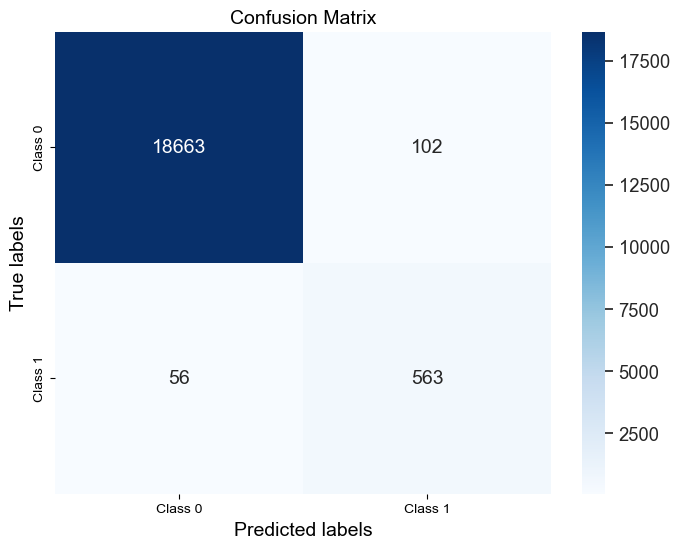

In [21]:

# Define the confusion matrix
# confusion_matrix_orig = np.array([[18663, 102], [56, 563]])

# Define the class labels
class_names = ['Class 0', 'Class 1']

# Define the figure size and font sizes
fig, ax = plt.subplots(figsize=(8, 6))
font_size = 14
sns.set(font_scale=1.2)

# Create the heatmap
sns.heatmap(confusion_matrix_orig, annot=True, cmap='Blues', fmt='g', xticklabels=class_names, yticklabels=class_names, annot_kws={"size": font_size})

# Set the axis labels and title
ax.set_xlabel('Predicted labels', fontsize=font_size)
ax.set_ylabel('True labels', fontsize=font_size)
ax.set_title('Confusion Matrix', fontsize=font_size)

# Show the plot
plt.show()


In [22]:
# Print the classification report for the model
print(confusion_matrix_orig)
#tn,fp,fn,tn


[[18663   102]
 [   56   563]]


In [23]:
# Print the classification report for the model
#gives over3all picture
target_names = ['0','1']
report = classification_report(y_test, pred, target_names=target_names, output_dict=True)
df = pd.DataFrame(report).transpose()
print(df)


              precision    recall  f1-score       support
0              0.997008  0.994564  0.995785  18765.000000
1              0.846617  0.909532  0.876947    619.000000
accuracy       0.991849  0.991849  0.991849      0.991849
macro avg      0.921812  0.952048  0.936366  19384.000000
weighted avg   0.992206  0.991849  0.991990  19384.000000


In [24]:
#The overall accuracy of the model can be computed as (TP+TN)/(TP+TN+FP+FN), a

# Calculate the overall accuracy of the model
accuracy = (confusion_matrix_orig[0][0] + confusion_matrix_orig[1][1]) / sum(sum(confusion_matrix_orig))

print("Overall accuracy: {:.2f}%".format(accuracy*100))


Overall accuracy: 99.18%


In [25]:
# Precision = TP / (TP + FP)

precision = (confusion_matrix_orig[1][1] / (confusion_matrix_orig[1][1] + confusion_matrix_orig[0][1]))
print("Overall precision: {:.2f}%".format(precision*100))

 

Overall precision: 84.66%


In [26]:
            
# Recall = TP / (TP + FN)
recall = (confusion_matrix_orig[1][1] / (confusion_matrix_orig[1][1] + confusion_matrix_orig[1][0]))
print("Overall recall: {:.2f}%".format(recall*100))

# F1-score = 2 * (Precision * Recall) / (Precision + Recall)


Overall recall: 90.95%


### Step 4: Answer the following question.

**Question:** How well does the logistic regression model predict both the `0` (healthy loan) and `1` (high-risk loan) labels?

**Answer:** 
18663 negative instances were correctly predicted
102 false positives

56 positive instances were incorrectly predicted
563 positive instances were correctly predicted

The model predicts that the healthy loans have a high reliability and the model will predict well and is correct 99.7% of the time. However, the model only predicts the risky loans with 84.7% and incorrectly predicts 15.3%. This could be an issue when predicting bad loans.



---

## Predict a Logistic Regression Model with Resampled Training Data

### Step 1: Use the `RandomOverSampler` module from the imbalanced-learn library to resample the data. Be sure to confirm that the labels have an equal number of data points. 
This will help to look at imbalanced data from oversampling the minority or loans that defaulted and increaswed its size to match the majority. This could introduce bias into the set.

In [27]:
# Import the RandomOverSampler module form imbalanced-learn
# from imblearn.over_sampling import RandomOverSampler

# Instantiate the random oversampler model
# # Assign a random_state parameter of 1 to the model
random_over_sampler = RandomOverSampler(random_state=1)

# Fit the original training data to the random_oversampler model
X_resampled, y_resampled = random_over_sampler.fit_resample(X_train, y_train)
X_resampled[:5], y_resampled[:5]

(   loan_size  interest_rate  borrower_income  debt_to_income  num_of_accounts  \
 0     8600.0          6.792            44500        0.325843                3   
 1     7800.0          6.419            41000        0.268293                2   
 2    10000.0          7.386            50100        0.401198                4   
 3     9300.0          7.093            47300        0.365751                3   
 4     9200.0          7.045            46900        0.360341                3   
 
    derogatory_marks  total_debt  
 0                 0       14500  
 1                 0       11000  
 2                 1       20100  
 3                 0       17300  
 4                 0       16900  ,
 0    0
 1    0
 2    0
 3    0
 4    0
 Name: loan_status, dtype: int64)

In [28]:
# Count the distinct values of the resampled labels data

print("Number of data points for each label after resampling:", np.bincount(y_resampled))


Number of data points for each label after resampling: [56271 56271]


### Step 2: Use the `LogisticRegression` classifier and the resampled data to fit the model and make predictions.

In [29]:
# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
logisticregress_model = LogisticRegression(random_state=1)

# Fit the model using the resampled training data
logisticregress_model.fit(X_resampled, y_resampled)

# Make a prediction using the testing data
resampled_prediction =logisticregress_model.predict(X_resampled)

resampled_prediction[:5]



array([0, 0, 0, 0, 0])

### Step 3: Evaluate the model’s performance by doing the following:

* Calculate the accuracy score of the model.

* Generate a confusion matrix.

* Print the classification report.

In [30]:
# Print the balanced_accuracy score of the model 
resampled_accuracy_score = accuracy_score(y_resampled,resampled_prediction)
resampled_accuracy_score

0.9947308560359688

In [31]:
# Generate a confusion matrix for the model
#confusion_matrix = confusion_matrix(y_test, pred)

#The confusion matrix is a table that shows the number of true positives (TP), true negatives (TN), false positives (FP), and false negatives (FN) predicted by the model. 
resampled_confusion_matrix = confusion_matrix(y_resampled, resampled_prediction)
print(resampled_confusion_matrix)

[[55964   307]
 [  286 55985]]


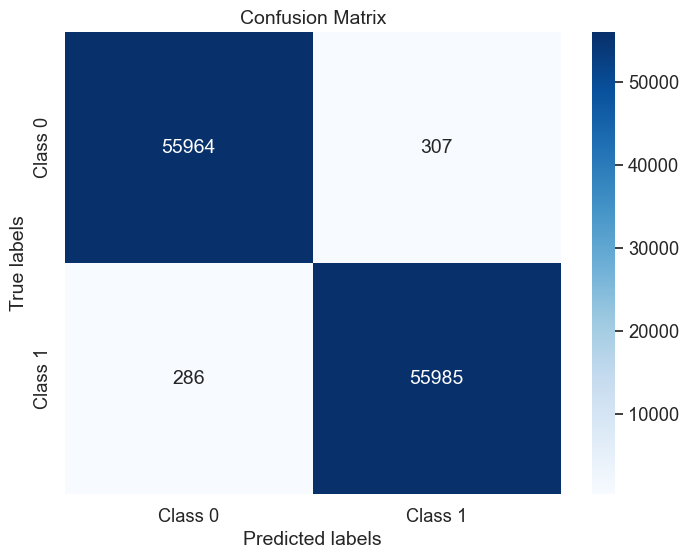

In [32]:
# Define the confusion matrix

# Define the class labels
class_names = ['Class 0', 'Class 1']

# Define the figure size and font sizes
fig, ax = plt.subplots(figsize=(8, 6))
font_size = 14
sns.set(font_scale=1.2)

# Create the heatmap
sns.heatmap(resampled_confusion_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=class_names, yticklabels=class_names, annot_kws={"size": font_size})
# Set the axis labels and title
ax.set_xlabel('Predicted labels', fontsize=font_size)
ax.set_ylabel('True labels', fontsize=font_size)
ax.set_title('Confusion Matrix', fontsize=font_size)

# Show the plot
plt.show()

In [33]:
r_precision = (resampled_confusion_matrix[1][1] / (resampled_confusion_matrix[1][1] + resampled_confusion_matrix[0][1]))
print("Overall precision: {:.2f}%".format(r_precision*100))

 

Overall precision: 99.45%


In [34]:
#origianl 75/25
# Print the classification report for the model
#gives over3all picture
target_names = ['0','1']
report = classification_report(y_test, pred, target_names=target_names, output_dict=True)
df_original = pd.DataFrame(report).transpose()
print(df_original)

              precision    recall  f1-score       support
0              0.997008  0.994564  0.995785  18765.000000
1              0.846617  0.909532  0.876947    619.000000
accuracy       0.991849  0.991849  0.991849      0.991849
macro avg      0.921812  0.952048  0.936366  19384.000000
weighted avg   0.992206  0.991849  0.991990  19384.000000


In [35]:
# Print the classification report for the resampled model

report = classification_report(y_resampled, resampled_prediction,output_dict=True)
df_resampled = pd.DataFrame(report).transpose()
print(df_resampled)

              precision    recall  f1-score        support
0              0.994916  0.994544  0.994730   56271.000000
1              0.994546  0.994917  0.994732   56271.000000
accuracy       0.994731  0.994731  0.994731       0.994731
macro avg      0.994731  0.994731  0.994731  112542.000000
weighted avg   0.994731  0.994731  0.994731  112542.000000


### Step 4: Answer the following question

**Question:** How well does the logistic regression model, fit with oversampled data, predict both the `0` (healthy loan) and `1` (high-risk loan) labels?


In the original sampling, I recieved an accuracy of 99.1%, however, the precision of the loans that were classified as 0 was only 85%. This meant that 15% of loans that defaulted were not classified or predicted that way, resulting in a loss for the bank.

After resampling, the precision of true positives that were predicted as positive for class 0 was 0.994916, which means that out of all the samples predicted as 0, 99.49% were actually 0. For class 1, the precision was 0.994546, which means that out of all the samples predicted as 1, 99.45% were actually 1. This also applies to the F-1 and Recall. This means that the model was preforming well and correctly idenitifying the good and faulty loans predictions.